Question 1: Explain the differences between AI, ML, Deep Learning (DL), and Data Science (DS).
Answer:
- Artificial Intelligence (AI): Broad field to create machines that mimic human intelligence.
- Machine Learning (ML): Subset of AI where machines learn from data.
- Deep Learning (DL): Subset of ML using deep neural networks for complex tasks (images, NLP).
- Data Science (DS): Field combining statistics, ML, and domain knowledge to extract insights.

Question 2: What are the types of machine learning? Describe each with one real-world example.
Answer:
1. Supervised Learning: Uses labeled data. Example: Predicting house prices.
2. Unsupervised Learning: Finds patterns in unlabeled data. Example: Customer segmentation.
3. Reinforcement Learning: Learns via rewards and penalties. Example: Self-driving cars.

Question 3: Define overfitting, underfitting, and the bias-variance tradeoff in machine learning.
Answer:
- Overfitting: Model learns noise, performs poorly on test data.
- Underfitting: Model is too simple, fails to capture patterns.
- Bias-Variance Tradeoff: Balancing underfitting (high bias) and overfitting (high variance).


Question 4: What are outliers in a dataset, and list three common techniques for handling them.
Answer:
Outliers are data points that deviate significantly from other observations.
Techniques:
1. Remove using IQR or Z-score.
2. Cap/Floor values (Winsorization).
3. Transform data (log/Box-Cox).


Question 5: Explain handling missing values and mention one imputation technique each for numerical & categorical.

Answer:
Steps:
- Identify missing values.
- Analyze missingness pattern.
- Handle with deletion or imputation.
Numerical: Mean/Median imputation.
Categorical: Mode imputation.

In [12]:
# Question 6: Write a Python program that:
#● Creates a synthetic imbalanced dataset with make_classification() from sklearn.datasets.
#● Prints the class distribution.

from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=1000, n_features=5, n_informative=3,
                           n_redundant=0, weights=[0.9, 0.1], random_state=42)
unique, counts = np.unique(y, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))

Class distribution: {np.int64(0): np.int64(894), np.int64(1): np.int64(106)}


In [10]:
# Question 7: Implement one-hot encoding using pandas for the following list of colors:['Red', 'Green', 'Blue', 'Green', 'Red']. Print the resulting dataframe from sklearn.datasets import make_classification
import pandas as pd
colors = ['Red', 'Green', 'Blue', 'Green', 'Red']
df = pd.DataFrame(colors, columns=['Color'])
df_encoded = pd.get_dummies(df, columns=['Color'])
print(df_encoded)

   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True


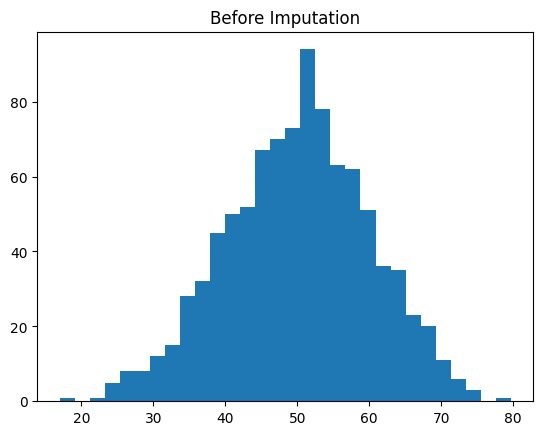

/tmp/ipython-input-1797435905.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value'].fillna(df['Value'].mean(), inplace=True)


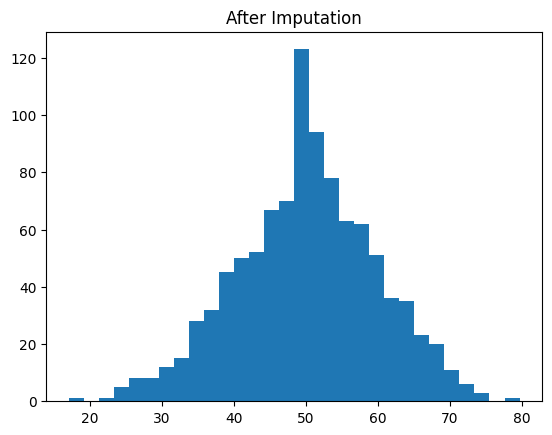

In [7]:
# Question 8: Write a Python script to:
#● Generate 1000 samples from a normal distribution.
#● Introduce 50 random missing values.
#● Fill missing values with the column mean.
#● Plot a histogram before and after imputation.

import matplotlib.pyplot as plt

data = np.random.normal(loc=50, scale=10, size=1000)
data[np.random.choice(1000, 50, replace=False)] = np.nan

# Plot before imputation
plt.hist(data[~np.isnan(data)], bins=30)
plt.title("Before Imputation")
plt.show()

# Impute with mean
df = pd.DataFrame(data, columns=['Value'])
df['Value'].fillna(df['Value'].mean(), inplace=True)

# Plot after imputation
plt.hist(df['Value'], bins=30)
plt.title("After Imputation")
plt.show()

In [8]:
# Question 9: Implement Min-Max scaling on the following list of numbers [2, 5, 10, 15,20] using sklearn.preprocessing.MinMaxScaler. Print the scaled array.

from sklearn.preprocessing import MinMaxScaler
data = np.array([[2], [5], [10], [15], [20]])
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
print("Scaled Data:\n", scaled)

Scaled Data:
 [[0.        ]
 [0.16666667]
 [0.44444444]
 [0.72222222]
 [1.        ]]


In [13]:
# Q10. You are working as a data scientist for a retail company. You receive a customer transaction dataset that contains:
#● Missing ages,
#● Outliers in transaction amount,
#● A highly imbalanced target (fraud vs. non-fraud),
#● Categorical variables like payment method.
#Explain the step-by-step data preparation plan you’d follow before training a machine learning model. Include how you’d address missing data, outliers, imbalance, and encoding

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, precision_recall_curve

# ---------- 1) Create a synthetic dataset ----------
rng = np.random.RandomState(42)
n = 8000

# Age with some missing
age = rng.normal(35, 10, size=n).clip(18, 90)
missing_idx = rng.choice(n, size=int(0.12*n), replace=False)  # 12% missing
age[missing_idx] = np.nan

# Transaction amounts: heavy-tailed + injected outliers
amount = np.exp(rng.normal(3.5, 0.9, size=n))  # log-normal-ish
outlier_idx = rng.choice(n, size=60, replace=False)
amount[outlier_idx] *= 20  # spike some large outliers

# Categorical: payment method
methods = np.array(["Card", "UPI", "Wallet", "NetBanking", "COD"])
payment = rng.choice(methods, size=n, p=[0.45, 0.3, 0.1, 0.1, 0.05])

# Target (highly imbalanced), correlated a bit with large amount & method
base_prob = 0.02 + 0.00002*amount  # higher amounts slightly more likely
base_prob += np.isin(payment, ["COD", "Wallet"]) * 0.01
base_prob = np.clip(base_prob, 0, 0.9)
y = rng.binomial(1, base_prob)

df = pd.DataFrame({
    "Age": age,
    "TransactionAmount": amount,
    "PaymentMethod": payment,
    "IsFraud": y
})

print("Class balance:", df["IsFraud"].value_counts(normalize=True).to_dict())

# ---------- 2) Train/validation split (stratified, to prevent leakage) ----------
X = df.drop(columns=["IsFraud"])
y = df["IsFraud"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ---------- 3) Preprocess: impute, transform amount, scale, encode ----------
num_features = ["Age", "TransactionAmount"]
cat_features = ["PaymentMethod"]

def log1p_amount(X):
    # X is a 2D array for numeric features in column order [Age, TransactionAmount]
    X = X.copy()
    amt_col = 1  # second column is TransactionAmount
    X[:, amt_col] = np.log1p(X[:, amt_col])
    return X

numeric_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("log_amount", FunctionTransformer(log1p_amount, feature_names_out="one-to-one")),
    ("scale", RobustScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_features),
        ("cat", categorical_pipeline, cat_features),
    ]
)

# ---------- 4) Model with class weights (simple approach to imbalance) ----------
clf = LogisticRegression(max_iter=200, class_weight="balanced")

pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", clf)
])

# ---------- 5) Fit & evaluate ----------
pipe.fit(X_train, y_train)
proba = pipe.predict_proba(X_test)[:, 1]
pred = (proba >= 0.5).astype(int)

print("\nROC-AUC:", roc_auc_score(y_test, proba))
print("PR-AUC (Average Precision):", average_precision_score(y_test, proba))
print("\nClassification report (0.50 threshold):\n", classification_report(y_test, pred, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, pred))

# Optional: pick a threshold targeting ~0.85 recall
prec, rec, thr = precision_recall_curve(y_test, proba)
target_recall = 0.85
idx = np.argmax(rec >= target_recall)
if idx < len(thr):
    t_star = thr[idx]
    pred_star = (proba >= t_star).astype(int)
    print(f"\nUsing threshold ~{t_star:.3f} for ≈{target_recall:.2f} recall:")
    print(classification_report(y_test, pred_star, digits=4))

Class balance: {0: 0.975, 1: 0.025}

ROC-AUC: 0.5285897435897435
PR-AUC (Average Precision): 0.03294996626298028

Classification report (0.50 threshold):
               precision    recall  f1-score   support

           0     0.9772    0.6865    0.8065      1560
           1     0.0298    0.3750    0.0551        40

    accuracy                         0.6787      1600
   macro avg     0.5035    0.5308    0.4308      1600
weighted avg     0.9535    0.6787    0.7877      1600

Confusion matrix:
 [[1071  489]
 [  25   15]]

Using threshold ~0.356 for ≈0.85 recall:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      1560
           1     0.0250    1.0000    0.0488        40

    accuracy                         0.0250      1600
   macro avg     0.0125    0.5000    0.0244      1600
weighted avg     0.0006    0.0250    0.0012      1600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
